In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [28]:
# Read file
icfes = pd.read_csv("./data/icfes.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)
icfes.head()

(559253, 81)


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,URBANO,N,B,TÉCNICO/ACADÉMICO,17228,376001000314,376001000314,76,76001,VALLE,...,15,4,1,20171,35,177,45,44,31,28
1,URBANO,NaN,B,NaN,663120,319001005240,319001005240,19,19001,CAUCA,...,78,62,85,20171,66,326,55,67,61,70
2,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,91,99,76,20171,70,378,100,72,86,66
3,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,96,96,100,20171,72,389,85,75,79,83
4,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,38,35,63,20171,52,281,80,54,50,61


In [29]:
# Drop columns
columns_to_drop = ['ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 
                   'COLE_CODIGO_ICFES', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 
                   'COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 
                   'ESTU_COD_DEPTO_PRESENTACION', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 
                   'PERCENTIL_C_NATURALES', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES', 
                   'PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS', 'PERCENTIL_SOCIALES_CIUDADANAS']

icfes = icfes.drop(columns=columns_to_drop)

In [30]:
# Drop records without socioeconomic data
icfes = icfes.dropna(axis=0, how='all', subset=['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
                                                 'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS',
                                                'FAMI_TIENEAUTOMOVIL'])

# Verify the dropping
icfes3 = icfes.loc[icfes['FAMI_ESTRATOVIVIENDA'].isnull() 
           & icfes['FAMI_TIENECOMPUTADOR'].isnull() 
           & icfes['FAMI_TIENELAVADORA'].isnull() 
           & icfes['FAMI_TIENEHORNOMICROOGAS'].isnull() 
           & icfes['FAMI_TIENEAUTOMOVIL'].isnull()]

icfes3[['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
        'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL']]

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL


In [31]:
# Use the same value for equivalent values
edu_dict = {"No Sabe":"No sabe", 
            "Primaria Completa": 'Primaria completa', 
            "Primaria Incompleta": 'Primaria incompleta',
            "Secundaria(Bachillerato) Incompleta": 'Secundaria (Bachillerato) incompleta', 
            "Secundaria(Bachillerato) Completa": 'Secundaria (Bachillerato) completa', 
            "Educación Técnica o Tecnológica Completa": 'Técnica o tecnológica completa', 
            "Educación Técnica o Tecnológica Incompleta": 'Técnica o tecnológica incompleta', 
            "Educación Profesional Incompleta": 'Educación profesional incompleta', 
            "Educación Profesional Completa": 'Educación profesional completa'}


icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].replace(to_replace=edu_dict)
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].replace(to_replace=edu_dict)

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].replace(
    to_replace={"Comunidad Rom (gitana)": "Comunidades Rom (Gitanas)"})

icfes['ESTU_HORASSEMANATRABAJA'] = icfes['ESTU_HORASSEMANATRABAJA'].replace(
    to_replace={"0": "No trabaja"})

icfes['FAMI_CUARTOSHOGAR'] = icfes['FAMI_CUARTOSHOGAR'].replace(
    to_replace={"1": "Uno",
               "2": "Dos",
               "3": "Tres",
               "4": "Cuatro",
               "5": "Cinco",})

In [32]:
# Fix capitalization
def capitalize(df, columns):
    for c in columns:
        df[c] = df[c].str.capitalize()

columns = ['ESTU_TIENEETNIA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']

capitalize(icfes, columns)

In [33]:
# Drop 90% > missing values
icfes = icfes.drop(columns=['FAMI_TIENEINTERNET'])

# Fill Missing values
icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].fillna('Ninguno')
icfes['ESTU_TIENEETNIA'] = icfes['ESTU_TIENEETNIA'].fillna('No')

#14094 4%
icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].fillna('No responde')
#14082 4%
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].fillna('No responde')
#16023 4%
icfes['FAMI_ESTRATOVIVIENDA'] = icfes['FAMI_ESTRATOVIVIENDA'].fillna('No responde')
#16328 4%
icfes['FAMI_TIENESERVICIOTV'] = icfes['FAMI_TIENESERVICIOTV'].fillna('No responde')
#14600 4%
icfes['FAMI_NUMLIBROS'] = icfes['FAMI_NUMLIBROS'].fillna('No responde')
#14779 4%
icfes['FAMI_COMELECHEDERIVADOS'] = icfes['FAMI_COMELECHEDERIVADOS'].fillna('No responde')
#15744 4%
icfes['FAMI_COMECARNEPESCADOHUEVO'] = icfes['FAMI_COMECARNEPESCADOHUEVO'].fillna('No responde')
#15609 4%
icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].fillna('No responde')
#15145 4%
icfes['ESTU_DEDICACIONLECTURADIARIA'] = icfes['ESTU_DEDICACIONLECTURADIARIA'].fillna('No responde')
#17028 4%
icfes['ESTU_DEDICACIONINTERNET'] = icfes['ESTU_DEDICACIONINTERNET'].fillna('No responde')
#55162 14%
icfes['COLE_BILINGUE'] = icfes['COLE_BILINGUE'].fillna('SIN INFO')
#6017 2%
icfes['COLE_CARACTER'] = icfes['COLE_CARACTER'].fillna('SIN INFO')

In [44]:
columns = ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 
          'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 
           'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE', 
           'FAMI_TRABAJOLABORMADRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 
          'ESTU_PRIVADO_LIBERTAD', 'ESTU_NSE_INDIVIDUAL']

summary = pd.DataFrame(columns=['Attribure', 'NaN count', 'NaN count (%)', 'most frequent'])
icfes2 = pd.DataFrame()

# Replace missing values with the most common one
i=0
for c in columns:
    nan_count = icfes[c].isnull().sum()
    if nan_count > 0:
        most_frequent = icfes[c].value_counts().idxmax()
        summary.loc[summary.shape[0]] = [c, nan_count, nan_count/icfes.shape[0], most_frequent]
        
        icfes[c] = icfes[c].fillna(most_frequent)
        
summary

,Attribure,NaN count,NaN count (%),most frequent
0,ESTU_GENERO,5,0.000009,F
1,ESTU_DEPTO_RESIDE,296,0.000534,BOGOTA
2,ESTU_MCPIO_RESIDE,296,0.000534,BOGOTÁ D.C.
3,FAMI_PERSONASHOGAR,7299,0.013159,3 a 4
4,FAMI_CUARTOSHOGAR,4489,0.008093,Tres
5,FAMI_TIENECOMPUTADOR,4599,0.008291,Si
6,FAMI_TIENELAVADORA,4018,0.007244,Si
7,FAMI_TIENEHORNOMICROOGAS,5059,0.009121,No
8,FAMI_TIENEAUTOMOVIL,5918,0.010669,No
9,FAMI_TIENEMOTOCICLETA,4865,0.008771,No


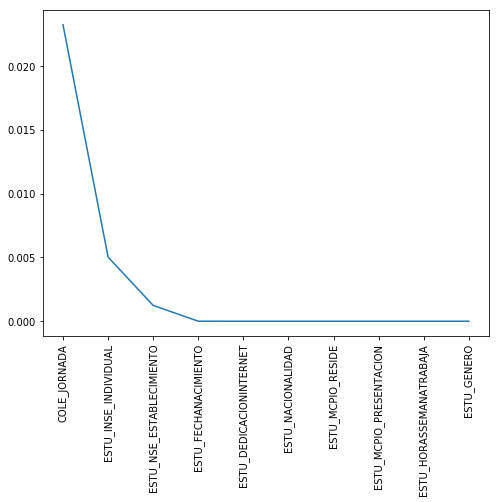

In [46]:
col = 'FAMI_TIENEINTERNET'

# icfes[col].describe(include='all')

# icfes[col].value_counts(dropna=False).sort_index()

plt.figure(figsize=(8, 6))

#icfes[col].value_counts(dropna=False).plot.bar()

null = icfes.isnull().sum() /icfes.shape[0]
null = null.sort_values(ascending=False)
plt.plot(null.iloc[:10])
plt.xticks(rotation=90)
plt.show()

In [47]:
import sklearn.decomposition
from sklearn_pandas import DataFrameMapper
import numpy as np


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_icfes = icfes.select_dtypes(include=numerics)

numeric_icfes.describe()

numeric_icfes.isnull().sum()

DESEMP_C_NATURALES               0
DESEMP_LECTURA_CRITICA           0
DESEMP_MATEMATICAS               0
DESEMP_SOCIALES_CIUDADANAS       0
ESTU_INSE_INDIVIDUAL          2786
ESTU_NSE_ESTABLECIMIENTO       686
PERIODO                          0
PUNT_C_NATURALES                 0
PUNT_GLOBAL                      0
PUNT_INGLES                      0
PUNT_LECTURA_CRITICA             0
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS         0
dtype: int64

In [48]:
# PCA
print(numeric_icfes.columns.shape)

pca_mapper = DataFrameMapper([
    (['DESEMP_C_NATURALES', 'DESEMP_LECTURA_CRITICA', 'PUNT_C_NATURALES'], 
     [sklearn.preprocessing.StandardScaler(), 
      sklearn.decomposition.PCA(n_components=1)])
    ], df_out=True)

np.round(pca_mapper.fit_transform(numeric_icfes.copy()), 2).head()

(13,)


/home/juan/Programas/Miniconda3/envs/dm/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,DESEMP_C_NATURALES_DESEMP_LECTURA_CRITICA_PUNT_C_NATURALES
0,2.49
1,-2.45
3,-3.61
4,-0.07
5,-3.73


In [49]:
icfes.to_csv("./data/icfes_preprocessing.csv", index=False, encoding="utf-8")